Mean Squared Error: 682.9127239190454


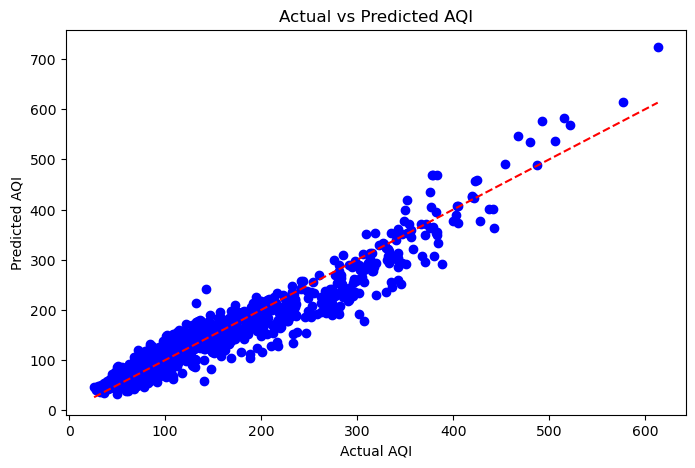

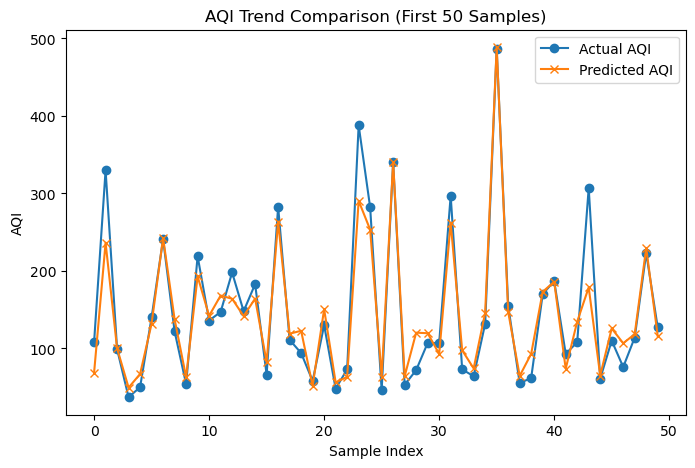

Predicted AQI for new input: 173.79408013424447


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv(r"C:\Users\Divya\Downloads\city_day.csv")
data.dropna(inplace=True)

# Features & target
X = data[['PM2.5', 'PM10', 'NO2', 'CO', 'O3']]
y = data['AQI']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ridge Regression model
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Graph 1: Actual vs Predicted AQI
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.show()

# Graph 2: AQI trend for first 50 samples (optional)
plt.figure(figsize=(8,5))
plt.plot(y_test.values[:50], label="Actual AQI", marker='o')
plt.plot(y_pred[:50], label="Predicted AQI", marker='x')
plt.xlabel("Sample Index")
plt.ylabel("AQI")
plt.title("AQI Trend Comparison (First 50 Samples)")
plt.legend()
plt.show()

# Predict AQI for new sample
sample = pd.DataFrame({
    'PM2.5': [81],
    'PM10': [124],
    'NO2': [20],
    'CO': [0.1],
    'O3': [127]
})

sample_scaled = scaler.transform(sample)
predicted_aqi = model.predict(sample_scaled)[0]
print("Predicted AQI for new input:", predicted_aqi)
